table:
- channel
- probelayout
- latency
- entrain

In [2]:
%matplotlib inline
import os
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def getLatencyDataFrom(filetitle, bandname, datadir="../../Data", resultdir="../../Result"):
    layoutfile = os.path.join(datadir, filetitle+'.csv')
    latencyfile = os.path.join(resultdir, "latency", 'compact'+filetitle+'_'+bandname+'.mat')
    
    csv = pd.read_csv(layoutfile)
    latency = loadmat(latencyfile)
    
    ch_idx = np.argsort(csv.channel.values)
    channels = csv.channel.values[ch_idx]
    positions = csv.position.values[ch_idx]
    
    result = pd.DataFrame({
        "channel":channels,
        "position":positions,
        "latency":latency["grating"][0,channels-1],
        "entrain":latency["entrain"][0,channels-1]
    })
    
    return result

In [11]:
result = getLatencyDataFrom('0903-1-5-rawdata', 'gamma')
result.head()

,channel,position,latency,entrain
0,1,occipital gyri,NaN,NaN
1,2,occipital gyri,NaN,NaN
2,3,white matter,NaN,NaN
3,4,white matter,0.754292,NaN
4,5,white matter,NaN,NaN


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


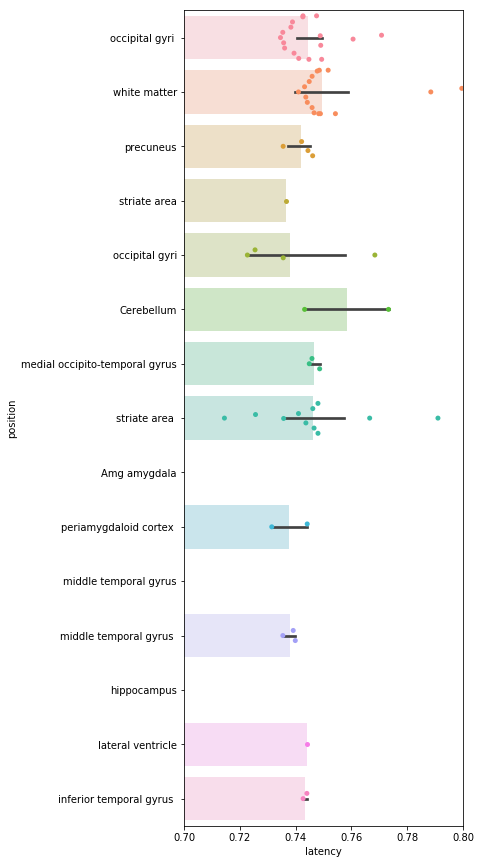

In [5]:
plt.figure(figsize=(5,15))
sns.barplot(y='position', x='latency', data=result, alpha=0.3)
sns.swarmplot(y='position', x='latency', data=result)
plt.xlim([.7, .8])
plt.show()

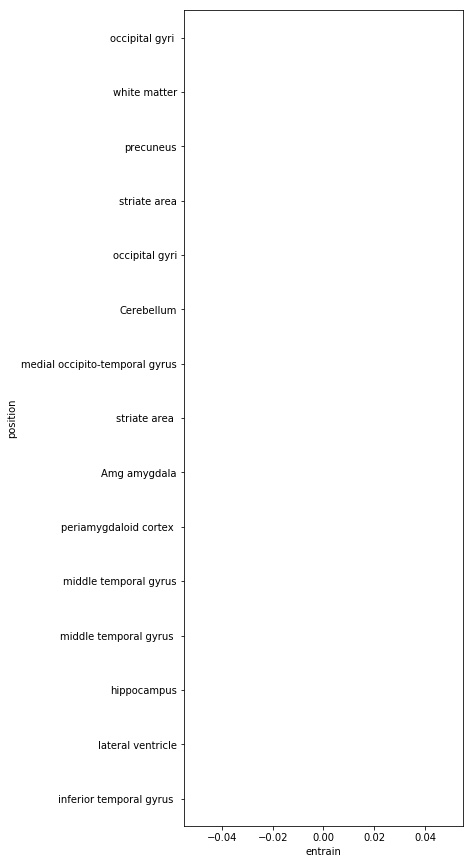

In [9]:
plt.figure(figsize=(5,15))
sns.barplot(y='position', x='entrain', data=result, alpha=0.3)
sns.swarmplot(y='position', x='entrain', data=result)
plt.show()